#### Import libraries

In [1]:
from __future__ import print_function, division
from collections import OrderedDict
import warnings
import os
import sys
import uuid

# pandas.pydata.org
import pandas as pd

# http://www.numpy.org/
import numpy as np

# https://scipy.org/
from scipy.interpolate import griddata, RectBivariateSpline, Rbf
from scipy.optimize import minimize, minimize_scalar

# https://github.com/usnistgov/DataModelDict
from DataModelDict import DataModelDict as DM

# https://github.com/usnistgov/atomman
import atomman as am
import atomman.unitconvert as uc

# https://github.com/usnistgov/iprPy
import iprPy

from GammaSurface import GammaSurface

#### Plotting libraries

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font',family='Times New Roman')
mpl.rc('lines',linewidth=3)

In [3]:
system = am.load('system_model', 'parent.xml', key='relaxed-atomic-system')[0]
gamma = GammaSurface(model='record.xml', box=system.box)

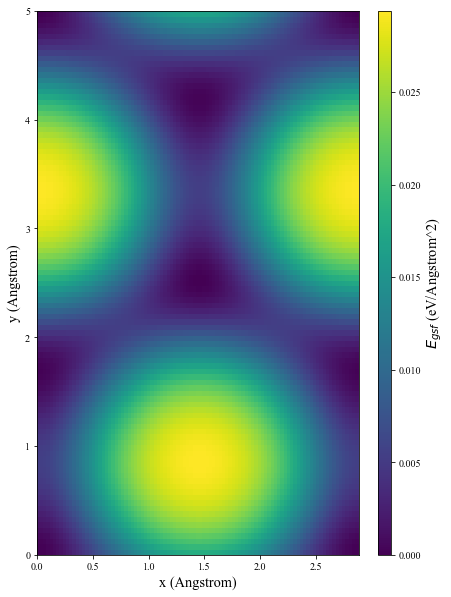

In [5]:
gamma.E_gsf_surface_plot()
plt.show()

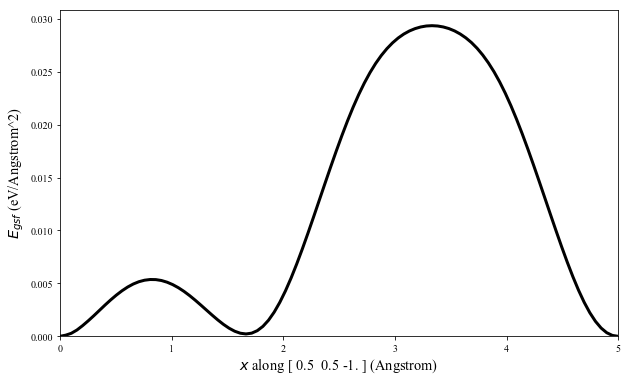

In [7]:
gamma.E_gsf_line_plot(gamma.a2vect)
plt.show()

In [18]:
def atan_disregistry(x, burgers, halfwidth=1, normalize=True, shift=True):
    """Builds the classic PN arctan disregistry"""
    disregistry = np.outer(np.arctan(x/halfwidth), burgers / np.pi) + burgers / 2
    
    if normalize is True:
        disregistry = disregistry - disregistry[0]
        disregistry = disregistry * np.linalg.norm(burgers) / np.linalg.norm(disregistry[-1])
    
    if shift is False:
        disregistry -= burgers / 2
        
    return disregistry

In [41]:
x, dx = np.linspace(-400, 400, 101, retstep=True)

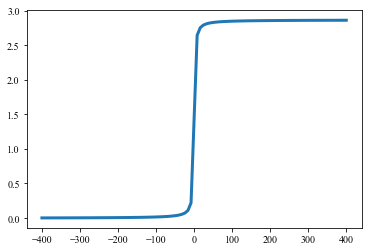

[ 2.86  0.   -2.86]
[ 0.  0.  0.]
[ 2.86  0.   -2.86]


In [37]:
d = atan_disregistry(x, 2.86*np.array([1, 0, -1]), halfwidth=2, shift=True, normalize=True)
plt.plot(x, d[:,0])
plt.show()
print(d[-1]-d[0])
print(d[0])
print(d[-1])

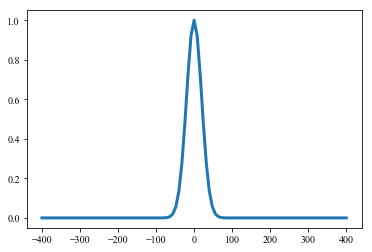

In [13]:
plt.plot(x, exp_disregistry(x, np.array([1, 0, -1]), halfwidth=20))

In [93]:
x, dx = np.linspace(-400, 400, 101, retstep=True)
d = atan_disregistry(x, 2.86*np.array([1, 0, -1]), halfwidth=20, shift=True, normalize=True)
t = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 1]])

In [94]:
x_i =   x[1:]
x_im1 = x[:-1]
d_i =   d[1:]
d_im1 = d[:-1]
rho_i = (d_i - d_im1) / dx

In [95]:
t[2,:]

array([0, 0, 1])

In [96]:
rho_i

array([[ 0.00011963,  0.        , -0.00011963],
       [ 0.0001246 ,  0.        , -0.0001246 ],
       [ 0.00012989,  0.        , -0.00012989],
       [ 0.00013552,  0.        , -0.00013552],
       [ 0.00014152,  0.        , -0.00014152],
       [ 0.00014793,  0.        , -0.00014793],
       [ 0.00015479,  0.        , -0.00015479],
       [ 0.00016214,  0.        , -0.00016214],
       [ 0.00017002,  0.        , -0.00017002],
       [ 0.00017849,  0.        , -0.00017849],
       [ 0.0001876 ,  0.        , -0.0001876 ],
       [ 0.00019744,  0.        , -0.00019744],
       [ 0.00020806,  0.        , -0.00020806],
       [ 0.00021957,  0.        , -0.00021957],
       [ 0.00023205,  0.        , -0.00023205],
       [ 0.00024563,  0.        , -0.00024563],
       [ 0.00026043,  0.        , -0.00026043],
       [ 0.00027661,  0.        , -0.00027661],
       [ 0.00029435,  0.        , -0.00029435],
       [ 0.00031384,  0.        , -0.00031384],
       [ 0.00033533,  0.        , -0.000

In [99]:
(x_i**2 - x_im1**2) / 2 * np.inner(rho_i, t[2,:])

array([ 0.37897938,  0.38675401,  0.39485345,  0.4032984 ,  0.41211141,
        0.42131699,  0.43094187,  0.44101529,  0.45156921,  0.46263874,
        0.47426245,  0.48648284,  0.49934687,  0.5129065 ,  0.52721945,
        0.54234996,  0.55836971,  0.57535901,  0.59340804,  0.61261845,
        0.63310523,  0.65499893,  0.67844837,  0.7036239 ,  0.73072146,
        0.75996741,  0.79162468,  0.82600029,  0.86345487,  0.90441465,
        0.94938672,  0.99897873,  1.0539243 ,  1.11511635,  1.18365091,
        1.26088546,  1.34851677,  1.44868525,  1.56411423,  1.69829252,
        1.85570239,  2.04206695,  2.26449664,  2.53110958,  2.84872584,
        3.21409254,  3.58421097,  3.7858533 ,  3.3199232 ,  1.43111664,
       -1.43111664, -3.3199232 , -3.7858533 , -3.58421097, -3.21409254,
       -2.84872584, -2.53110958, -2.26449664, -2.04206695, -1.85570239,
       -1.69829252, -1.56411423, -1.44868525, -1.34851677, -1.26088546,
       -1.18365091, -1.11511635, -1.0539243 , -0.99897873, -0.94

In [100]:
(x_i - x_im1) * (x_i + x_im1) / 2 * np.inner(rho_i, t[2,:])

array([ 0.37897938,  0.38675401,  0.39485345,  0.4032984 ,  0.41211141,
        0.42131699,  0.43094187,  0.44101529,  0.45156921,  0.46263874,
        0.47426245,  0.48648284,  0.49934687,  0.5129065 ,  0.52721945,
        0.54234996,  0.55836971,  0.57535901,  0.59340804,  0.61261845,
        0.63310523,  0.65499893,  0.67844837,  0.7036239 ,  0.73072146,
        0.75996741,  0.79162468,  0.82600029,  0.86345487,  0.90441465,
        0.94938672,  0.99897873,  1.0539243 ,  1.11511635,  1.18365091,
        1.26088546,  1.34851677,  1.44868525,  1.56411423,  1.69829252,
        1.85570239,  2.04206695,  2.26449664,  2.53110958,  2.84872584,
        3.21409254,  3.58421097,  3.7858533 ,  3.3199232 ,  1.43111664,
       -1.43111664, -3.3199232 , -3.7858533 , -3.58421097, -3.21409254,
       -2.84872584, -2.53110958, -2.26449664, -2.04206695, -1.85570239,
       -1.69829252, -1.56411423, -1.44868525, -1.34851677, -1.26088546,
       -1.18365091, -1.11511635, -1.0539243 , -0.99897873, -0.94

In [101]:
(x_i - x_im1) * (x_i + x_im1) / 2 * np.inner(d_i - d_im1, t[2,:]) / (x_i - x_im1)

array([ 0.37897938,  0.38675401,  0.39485345,  0.4032984 ,  0.41211141,
        0.42131699,  0.43094187,  0.44101529,  0.45156921,  0.46263874,
        0.47426245,  0.48648284,  0.49934687,  0.5129065 ,  0.52721945,
        0.54234996,  0.55836971,  0.57535901,  0.59340804,  0.61261845,
        0.63310523,  0.65499893,  0.67844837,  0.7036239 ,  0.73072146,
        0.75996741,  0.79162468,  0.82600029,  0.86345487,  0.90441465,
        0.94938672,  0.99897873,  1.0539243 ,  1.11511635,  1.18365091,
        1.26088546,  1.34851677,  1.44868525,  1.56411423,  1.69829252,
        1.85570239,  2.04206695,  2.26449664,  2.53110958,  2.84872584,
        3.21409254,  3.58421097,  3.7858533 ,  3.3199232 ,  1.43111664,
       -1.43111664, -3.3199232 , -3.7858533 , -3.58421097, -3.21409254,
       -2.84872584, -2.53110958, -2.26449664, -2.04206695, -1.85570239,
       -1.69829252, -1.56411423, -1.44868525, -1.34851677, -1.26088546,
       -1.18365091, -1.11511635, -1.0539243 , -0.99897873, -0.94

In [102]:
(x_i + x_im1) / 2 * np.inner(d_i - d_im1, t[2,:])

array([ 0.37897938,  0.38675401,  0.39485345,  0.4032984 ,  0.41211141,
        0.42131699,  0.43094187,  0.44101529,  0.45156921,  0.46263874,
        0.47426245,  0.48648284,  0.49934687,  0.5129065 ,  0.52721945,
        0.54234996,  0.55836971,  0.57535901,  0.59340804,  0.61261845,
        0.63310523,  0.65499893,  0.67844837,  0.7036239 ,  0.73072146,
        0.75996741,  0.79162468,  0.82600029,  0.86345487,  0.90441465,
        0.94938672,  0.99897873,  1.0539243 ,  1.11511635,  1.18365091,
        1.26088546,  1.34851677,  1.44868525,  1.56411423,  1.69829252,
        1.85570239,  2.04206695,  2.26449664,  2.53110958,  2.84872584,
        3.21409254,  3.58421097,  3.7858533 ,  3.3199232 ,  1.43111664,
       -1.43111664, -3.3199232 , -3.7858533 , -3.58421097, -3.21409254,
       -2.84872584, -2.53110958, -2.26449664, -2.04206695, -1.85570239,
       -1.69829252, -1.56411423, -1.44868525, -1.34851677, -1.26088546,
       -1.18365091, -1.11511635, -1.0539243 , -0.99897873, -0.94

In [111]:
-np.sum(0.5 * np.inner(((x_i + x_im1) * (d_i - d_im1).T).T, t[2,:]))

9.3258734068513149e-14

In [113]:
-np.sum(0.5 * np.inner(((x_i - x_im1) * (d_i + d_im1).T).T, t[2,:]))

1144.0

In [114]:
-np.sum((x_i**2 - x_im1**2) / 2 * np.inner(rho_i, t[2,:]))

9.3258734068513149e-14

In [118]:
-0.5 * np.inner(((x[1:] - x[:-1]) * (d[1:] + d[:-1]).T).T, t[2,:]).sum()

1144.0

In [119]:
-0.5 * np.inner(((x[1:] + x[:-1]) * (d[1:] - d[:-1]).T).T, t[2,:]).sum()

9.3258734068513149e-14

In [122]:
- 0.5 * np.sum((x[1:]**2 - x[:-1]**2) * np.inner(rho, t[2,:]))

9.3258734068513149e-14

In [123]:
-0.5 * np.sum(np.inner(t[2,:], (d[:-1] + d[1:]) * dx))

1144.0

In [124]:
d[4] - d[2]

array([ 0.00212322,  0.        , -0.00212322])

In [130]:
m = 7
np.sum(d[m:-m] * (d[m:-m] - (d[2*m:] + d[:-2*m]) / 2) * dx)

173.71556030996314